## Importing Librairies

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Readin Dataset And Printing Some Information

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
print(df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Plotting 2 Plots , Each One Descirbe Relation Between 2 Differnt Columns

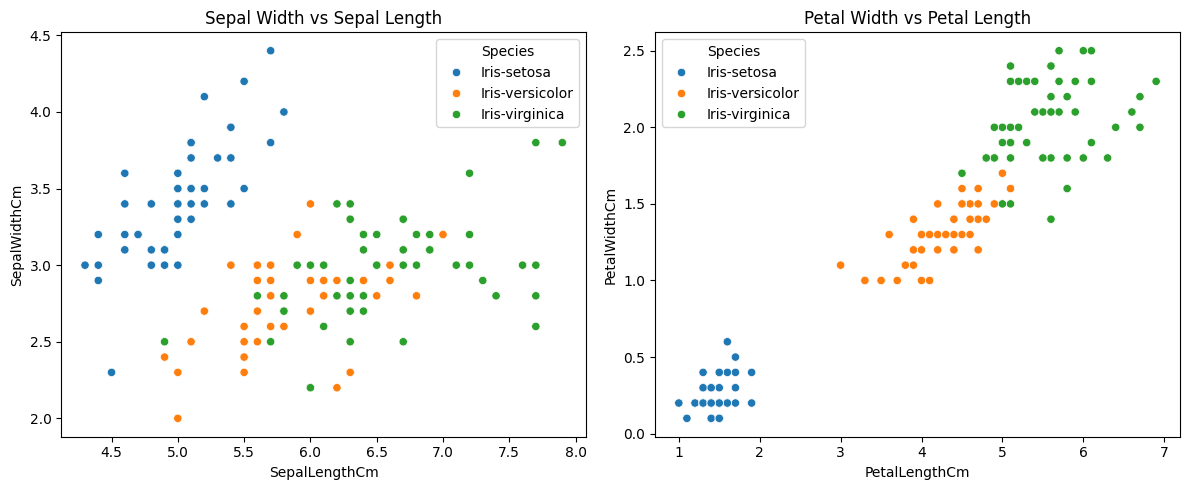

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', ax=axes[0])
axes[0].set_title('Sepal Width vs Sepal Length')


sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', ax=axes[1])
axes[1].set_title('Petal Width vs Petal Length')

plt.tight_layout()
plt.show()


## Spliting Data Into Features & Labels , Applying Some Preprocessing

In [10]:
X = df.drop('Species', axis=1).values
y = df['Species']

In [11]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
print(X.shape)
print(X[:5])

(150, 5)
[[1.  5.1 3.5 1.4 0.2]
 [2.  4.9 3.  1.4 0.2]
 [3.  4.7 3.2 1.3 0.2]
 [4.  4.6 3.1 1.5 0.2]
 [5.  5.  3.6 1.4 0.2]]


In [15]:
print(y.shape)
print(y[:5])

(150,)
[0 0 0 0 0]


## Spliting Data into Train & Test

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)

(120, 5)
(120,)


## Implimintg KNN Model from scratch using 3 different distances methods also from scratch

### The model contains also fit , predict and evaluate methods

In [ ]:
class ScratchKNNClassifier:
    def __init__(self, k=3, distance_type='euclidean'):
        self.k = k
        self.distance_type = distance_type

    def euclidean_distance(self, x1, x2):
        sum_sq_diff = 0
        for i in range(len(x1)):
            diff = x1[i] - x2[i]
            sum_sq_diff += diff ** 2
        return sum_sq_diff ** 0.5
    
    #---------------------------------------------
    
    def manhattan_distance(self, x1, x2):
        sum_abs_diff = 0
        for i in range(len(x1)):
            diff = abs(x1[i] - x2[i])
            sum_abs_diff += diff
        return sum_abs_diff
    
    #---------------------------------------------

    def cosine_similarity_distance(self, x1, x2):
        dot_product = 0
        sum_x1_sq = 0
        sum_x2_sq = 0
        
        for i in range(len(x1)):
            dot_product += x1[i] * x2[i]
            sum_x1_sq += x1[i] ** 2
            sum_x2_sq += x2[i] ** 2
        
        norm_x1 = (sum_x1_sq) ** 0.5
        norm_x2 = (sum_x2_sq) ** 0.5
        
        cosine_similarity = dot_product / (norm_x1 * norm_x2)
        
        return 1 - cosine_similarity  
    
    
    
    #---------------------------------------------


    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

   
    def predict(self, X_test):
        y_pred = []
        if self.distance_type == 'euclidean':
            distance_func = self.euclidean_distance
        elif self.distance_type == 'manhattan':
            distance_func = self.manhattan_distance
        elif self.distance_type == 'cosine':
            distance_func = self.cosine_similarity_distance
        else:
            raise ValueError("Invalid distance_type! Choose 'euclidean', 'manhattan', or 'cosine'.")

        for test_point in X_test:
            distances = []
            for i in range(len(self.X_train)):
                dist = distance_func(test_point, self.X_train[i])
                distances.append((dist, self.y_train[i]))
            distances.sort(key=lambda x: x[0])
            k_nearest = [label for (_, label) in distances[:self.k]]
            prediction = max(set(k_nearest), key=k_nearest.count)
            y_pred.append(prediction)
        return np.array(y_pred)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        print(f'Accuracy: {accuracy * 100:.2f}%')


## Testing the KNN scratch model

### Euclidean Distance

In [19]:
Knn_euclidean = ScratchKNNClassifier(k=3, distance_type='euclidean')
Knn_euclidean.fit(X_train, y_train)

In [20]:
y_pred_euclidean = Knn_euclidean.predict(X_test)

result = np.concatenate((y_test.reshape(-1, 1), y_pred_euclidean.reshape(-1, 1)), axis=1)

print(result[:5,:])

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


In [21]:
Knn_euclidean.evaluate(X_test, y_test)

Accuracy: 100.00%


### Manhattan Distance

In [22]:
Knn_manhattan = ScratchKNNClassifier(k=3, distance_type='manhattan')
Knn_manhattan.fit(X_train, y_train)

In [23]:
y_pred_manhattan = Knn_manhattan.predict(X_test)

result = np.concatenate((y_test.reshape(-1, 1), y_pred_manhattan.reshape(-1, 1)), axis=1)

print(result[:5,:])

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


In [24]:
y_true_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred_manhattan)

result = np.concatenate((
    y_true_decoded.reshape(-1, 1),
    y_pred_decoded.reshape(-1, 1)
), axis=1)

print(result[:5, :])


[['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']]


In [25]:
Knn_manhattan.evaluate(X_test, y_test)

Accuracy: 100.00%


### Cosine Similarity

In [26]:
Knn_cosine = ScratchKNNClassifier(k=3, distance_type='cosine')
Knn_cosine.fit(X_train, y_train)

In [27]:
y_pred_cosine = Knn_cosine.predict(X_test)

result = np.concatenate((y_test.reshape(-1, 1), y_pred_cosine.reshape(-1, 1)), axis=1)

print(result[:5,:])

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


In [28]:
Knn_cosine.evaluate(X_test, y_test)

Accuracy: 96.67%


## Scikit-Learn KNN Built In Model Using Euclidean Distance

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  
knn.fit(X_train, y_train)  


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [31]:
y_pred = knn.predict(X_test)

result = np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), axis=1)

print(result[:5,:])

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## Comparing Between The Scratch KNN Model & The Built In One Results Using Euclidean Distance

In [33]:
accuracy = accuracy_score(y_pred_euclidean, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%
